In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [4]:
# Load the datasets
X_train = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\Mayuri\\knn\\Diabetes_XTrain.csv')
Y_train = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\Mayuri\\knn\\Diabetes_YTrain.csv')
X_test = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\Mayuri\\knn\\Diabetes_Xtest.csv')


In [6]:
# Combine the training features with the labels
train_data = X_train.copy()
train_data['Outcome'] = Y_train


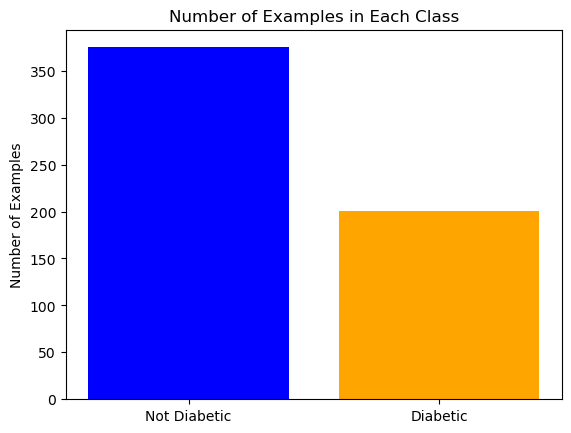

In [8]:
# Plot a bar graph showing the number of examples in each class
class_counts = train_data['Outcome'].value_counts()

plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], ['Not Diabetic', 'Diabetic'])
plt.ylabel('Number of Examples')
plt.title('Number of Examples in Each Class')
plt.show()


In [10]:
# Split the data into features (X) and labels (y)
X_train_features = train_data.drop(columns=['Outcome'])
y_train_labels = train_data['Outcome']


In [12]:
# Create a K-Nearest Neighbors classifier pipeline with standard scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Using 5 neighbors as a starting point
])


In [14]:
# Train the model
knn_pipeline.fit(X_train_features, y_train_labels)


Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [20]:
# Predict the outcomes for the test set
y_test_predictions = knn_pipeline.predict(X_test)
print(y_test_predictions)


[1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 0 0]


In [18]:
# Save the predictions to a CSV file
predictions_df = pd.DataFrame(y_test_predictions, columns=['Outcome'])
predictions_df.to_csv('Diabetes_Test_Predictions.csv', index=False)

print("Predictions saved to 'Diabetes_Test_Predictions.csv'")

Predictions saved to 'Diabetes_Test_Predictions.csv'
